## **Hyper-parameters and Tuning**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/Telco_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
## missing values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [4]:
## tree-based methods excel with dummy-encoded variables
## fewer computations
## can find non-linear relationships
## Gini index might work better than the entropy when with dummy-encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
## drop CustomerId
df.drop(columns = 'customerID', inplace = True)

In [6]:
for i in df.select_dtypes('object'):
    print(f'Variable {i} has {df[i].nunique()} levels')

Variable gender has 2 levels
Variable Partner has 2 levels
Variable Dependents has 2 levels
Variable PhoneService has 2 levels
Variable MultipleLines has 3 levels
Variable InternetService has 3 levels
Variable OnlineSecurity has 3 levels
Variable OnlineBackup has 3 levels
Variable DeviceProtection has 3 levels
Variable TechSupport has 3 levels
Variable StreamingTV has 3 levels
Variable StreamingMovies has 3 levels
Variable Contract has 3 levels
Variable PaperlessBilling has 2 levels
Variable PaymentMethod has 4 levels
Variable TotalCharges has 6531 levels
Variable Churn has 2 levels


In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [12]:
## impute with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [14]:
## before encoding just map Churn to 0 and 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [15]:
## get dummies for all variables
df = pd.get_dummies(df, drop_first = True)

In [16]:
## Create X matrix and y vector
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [18]:
## split 80% 20% random_state 591
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 591)

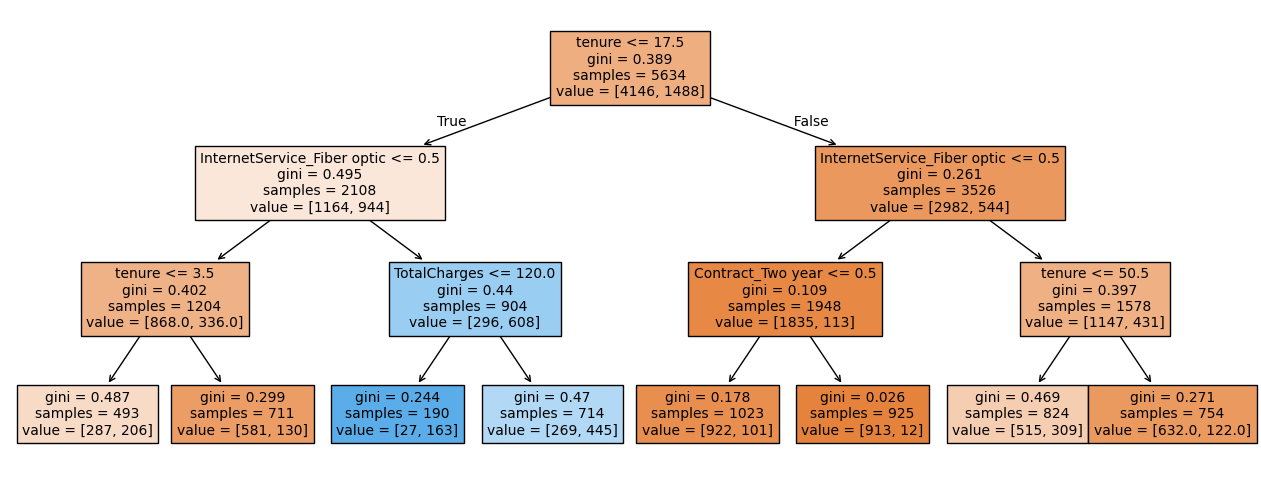

In [19]:
## fit a dt with max_depth = 3 - GINI
## plot the tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## instance
dt1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 591)

## fit
dt1.fit(X_train, y_train)

## plot the tree
plt.figure(figsize = (16,6))
plot_tree(dt1, filled = True, feature_names = X_train.columns, fontsize = 10);

In [20]:
## Customer has 10 months with the company
## Does not have Fiber Optic Internet Service
## $80
## what is the propensity to churn?
130/(711)

0.1828410689170183

In [21]:
## Which customers are the most likely to churn?
## tenure < 17.5
## have FO internet service
## total charges < $120
163 / 190

0.8578947368421053

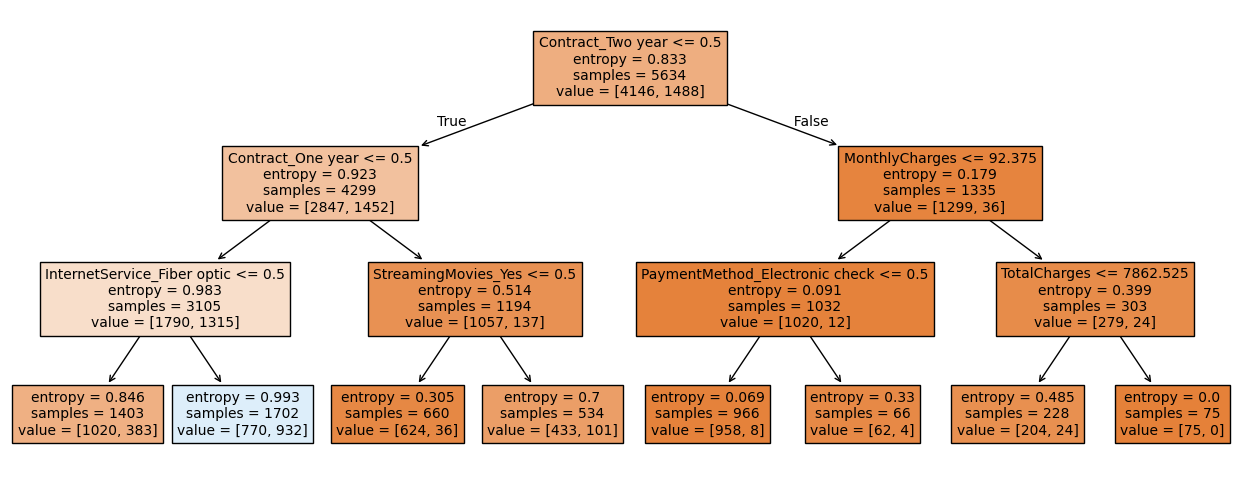

In [27]:
## fit a dt with max_depth = 3 - ENTROPY
## plot the tree

## instance
dt2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 591)

## fit
dt2.fit(X_train, y_train)

## plot the tree
plt.figure(figsize = (16,6))
plot_tree(dt2, filled = True, feature_names = X_train.columns, fontsize = 10);

In [23]:
## calculate the entropy improvement from parent node to children nodes
## parent node - 0.983 - n = 3105
## left child - 0.849 - n = 1403
## right child - 0.993 - n = 1702
combined_entropy = (1403/3105)*0.849 + (1702/3105)*0.993
combined_entropy

0.9279333333333333

In [24]:
## improvement
0.983 - combined_entropy

0.05506666666666671

In [25]:
## calculate the entropy at a given node
p1 = 770/1702
p2 = 932/1702
entropy = -  (p1*np.log2(p1) + p2*np.log2(p2))
entropy

0.9934549478809496

In [28]:
## high impurities, say GINI close to 0.5 or ENTROPY close to 1 on the terminal nodes
## or on the important terminal nodes means that you need to set different stopping rules

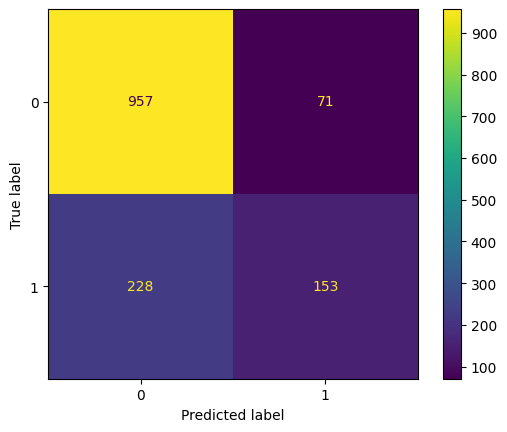

In [29]:
## Performance confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

## model 1
ConfusionMatrixDisplay(confusion_matrix(y_test, dt1.predict(X_test))).plot();

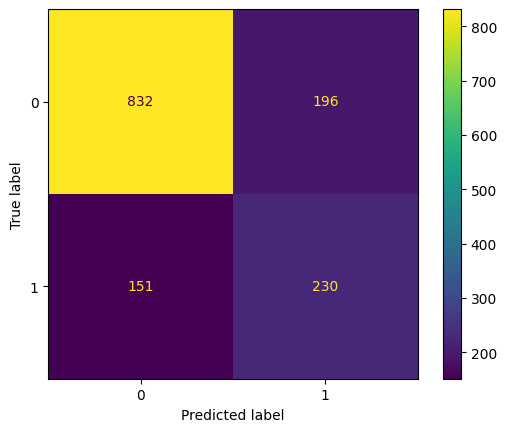

In [30]:
## model 2
ConfusionMatrixDisplay(confusion_matrix(y_test, dt2.predict(X_test))).plot();

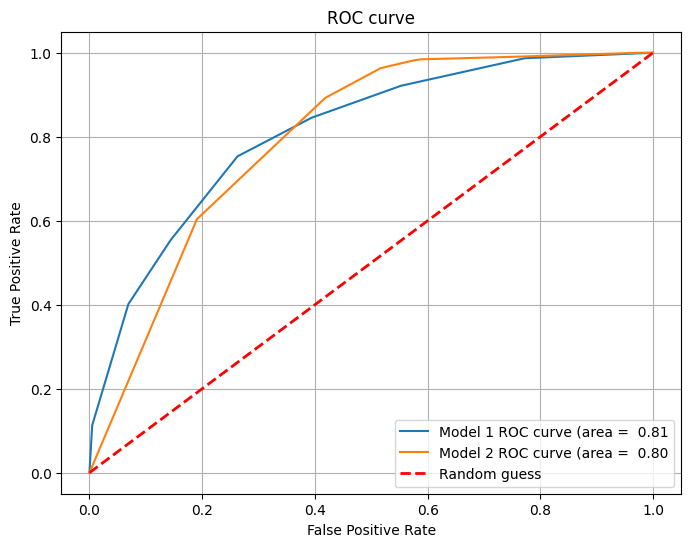

In [31]:
## which model is better?
## did I choose the best cutoff (0.5)?

## import modules
from sklearn.metrics import auc, roc_curve

## get phats for dt1 and dt2
phat1 = dt1.predict_proba(X_test)[:, 1]
phat2 = dt2.predict_proba(X_test)[:, 1]

## get TPR, FPR and Thresholds for dt1 and dt2

## Get TPR, FPR and Thresholds for EACH model
fpr1, tpr1, thresh1 = roc_curve(y_test, phat1)
fpr2, tpr2, thresh2 = roc_curve(y_test, phat2)


## Get AUCs for EACH model
AUC_val1 = auc(fpr1, tpr1)
AUC_val2 = auc(fpr2, tpr2)


## Plot ROC Curves with AUCs for EACH model
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.plot(fpr1, tpr1, label= f'Model 1 ROC curve (area = {AUC_val1: 0.2f}')
plt.plot(fpr2, tpr2, label= f'Model 2 ROC curve (area = {AUC_val2: 0.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [32]:
## We decide to send $80 discount to 20% of the customers
## do we send the offer randomly or to those who are the MOST LIKELY to churn?
## how much better is THIS to capture those who are likely to churn than doing this randomly?
## lift
!pip install kds
import kds

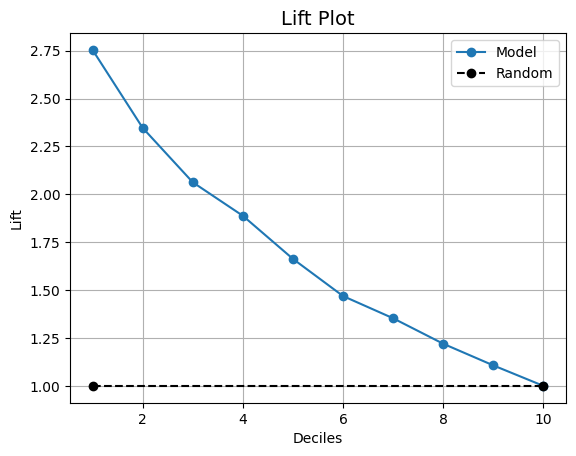

In [33]:
## just plot the lift curve
kds.metrics.plot_lift(y_test, dt1.predict_proba(X_test)[:,1])

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.623,0.858,0.703,141.0,105.0,36.0,38.1,141,74.468,141.0,105.0,141,36.0,10.007,27.559,37.008,3.502,24.057,2.754
1,2,0.418,0.623,0.539,141.0,74.0,67.0,38.1,141,52.482,282.0,179.0,282,103.0,20.014,46.982,74.016,10.019,36.963,2.347
2,3,0.375,0.418,0.398,141.0,57.0,84.0,38.1,99,40.426,423.0,236.0,381,187.0,30.021,61.942,100.000,18.191,43.751,2.063
3,4,0.183,0.375,0.365,141.0,52.0,89.0,38.1,0,36.879,564.0,288.0,381,276.0,40.028,75.591,100.000,26.848,48.743,1.888
4,5,0.183,0.183,0.183,141.0,29.0,112.0,38.1,0,20.567,705.0,317.0,381,388.0,50.035,83.202,100.000,37.743,45.459,1.663
5,6,0.162,0.183,0.165,141.0,19.0,122.0,38.1,0,13.475,846.0,336.0,381,510.0,60.043,88.189,100.000,49.611,38.578,1.469
6,7,0.099,0.162,0.131,141.0,25.0,116.0,38.1,0,17.730,987.0,361.0,381,626.0,70.050,94.751,100.000,60.895,33.856,1.353
7,8,0.099,0.099,0.099,141.0,11.0,130.0,38.1,0,7.801,1128.0,372.0,381,756.0,80.057,97.638,100.000,73.541,24.097,1.220
8,9,0.013,0.099,0.039,141.0,8.0,133.0,38.1,0,5.674,1269.0,380.0,381,889.0,90.064,99.738,100.000,86.479,13.259,1.107
9,10,0.013,0.013,0.013,140.0,1.0,139.0,38.1,0,0.714,1409.0,381.0,381,1028.0,100.000,100.000,100.000,100.000,0.000,1.000


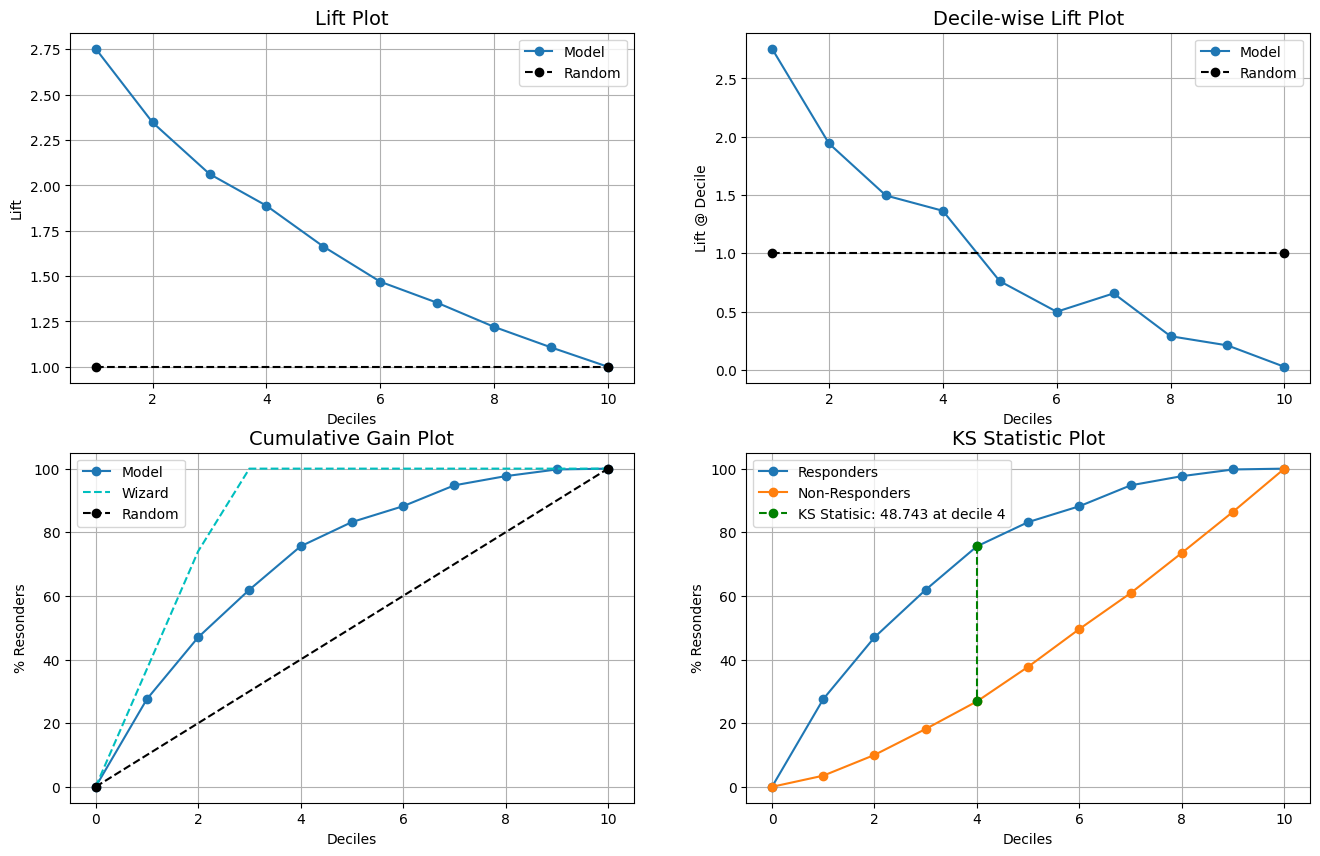

In [34]:
kds.metrics.report(y_test, phat1)

In [35]:
## unrestricted tree
dt_full = DecisionTreeClassifier()  ## no stopping - likely to overfit

## fit
dt_full.fit(X_train, y_train)

DecisionTreeClassifier()

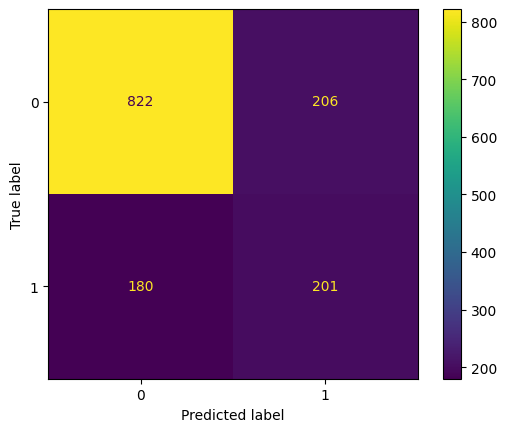

In [36]:
## Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, dt_full.predict(X_test))).plot();

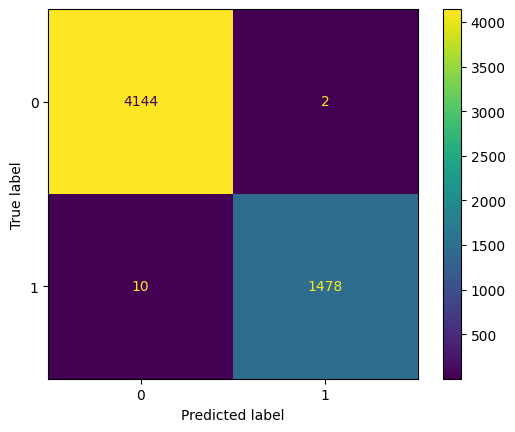

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_train, dt_full.predict(X_train))).plot();

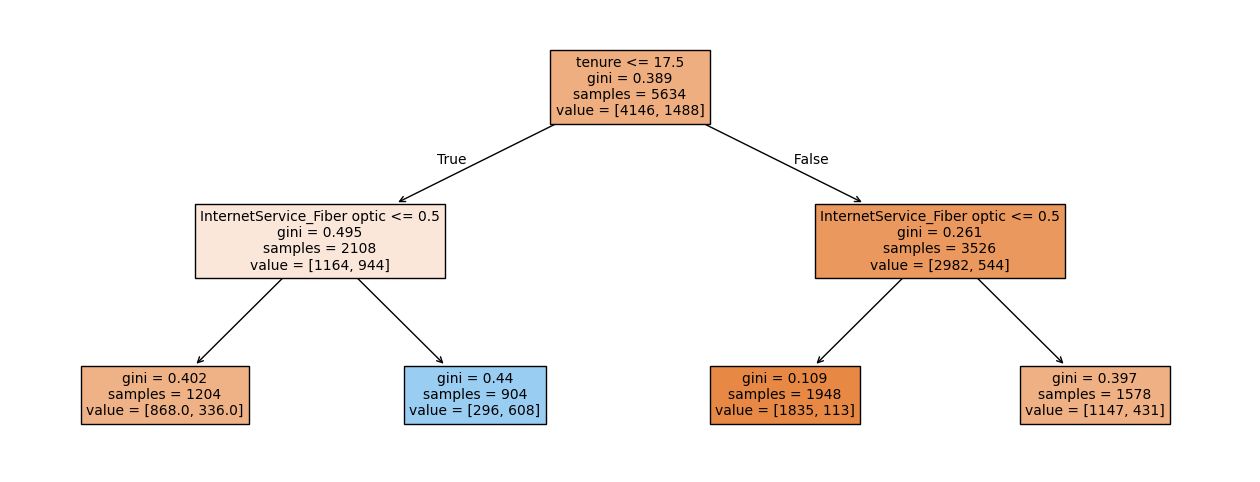

In [41]:
## Hyper-Parameters set before fitting

## instance
dt_new = DecisionTreeClassifier(min_impurity_decrease = 0.01)

## fit
dt_new.fit(X_train, y_train)

## plot
plt.figure(figsize = (16,6))
plot_tree(dt_new, filled = True, feature_names = X_train.columns, fontsize = 10);

In [42]:
## Grid Search
## You can set ALL the hyperparameter options you want to check
## the model AUTOMATICALLY checks ALL the combinations

## 1) set a grid
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [2, 20, 40],
}

## decide on CV (usually 5 or 10) higher means more computations
## use multiple cores: n_jobs = -1

## GridSearchCV in sklearn
from sklearn.model_selection import GridSearchCV

## instance on the MODEL UNRESTRICTED
dt = DecisionTreeClassifier()

## make an instace of GRIDSEARCH with the UNRESTRICTED MODEL
dt_grid = GridSearchCV(dt, param_grid, cv = 5, n_jobs = -1)

## fit
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, None],
                         'min_samples_split': [2, 20, 40]})

In [44]:
dt_grid.best_score_

0.78984887336663

In [45]:
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}